Mini Project #1 yang diberikan Senja untukku adalah mengulang teknik elbow method dengan percobaan rentang k dari 3 sampai 15. Kemudian tampilkan juga hasil plot dari nilai WSS yang ditampung ke dalam variable bernama wss!

In [20]:
#Import library pandas
import pandas as pd
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/RFM_customer.csv", encoding='utf8')
data.head()

,customer_id,frequency,recency,monetary
0,12346,1,48,27904840000
1,12347,2,40,423420000
2,12348,2,41,414092000
3,12350,1,33,119478000
4,12352,3,6,449984000


In [21]:
#Drop kolom customer_id
RFM_km = data.drop(["customer_id"], axis=1)

In [22]:
#Penerapan RobustScaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
RFM_robust = robust_scaler.fit_transform(RFM_km)
RFM_robust = pd.DataFrame(RFM_robust)
RFM_robust.columns = ["Frequency","Recency","Monetary"]

In [23]:
#Import library K-Means
from sklearn.cluster import KMeans


In [24]:
#Deklarasi variable wss
WSS = []

In [25]:
#Melakukan k-means berkali-kali dengan nilai k yang berbeda-beda dari 3 sampai 15
for k in range(3, 15):
	k_means = KMeans(n_clusters=k, random_state=0)
	model = k_means.fit(RFM_robust)
	WSS.append(k_means.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [26]:
#Import library matplotlib.pyplot
import matplotlib.pyplot as plt

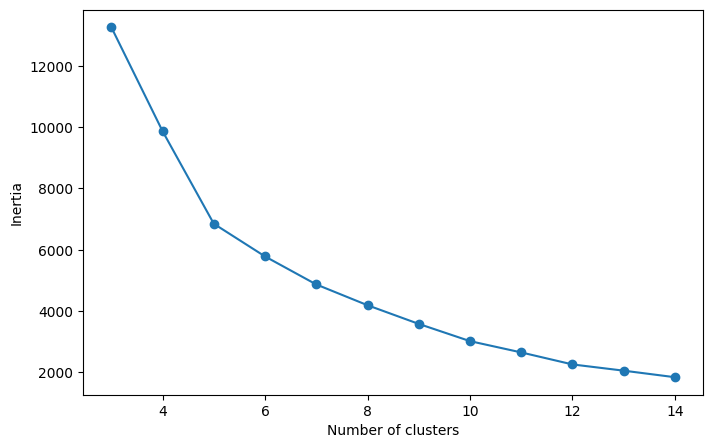

In [27]:
#Mengkonversi hasil ke dalam data frame, kemudian menampilkannya dalam bentuk plot
frame = pd.DataFrame({"Cluster":range(3,15), "WSS":WSS})
plt.figure(figsize=(8,5))
plt.plot(frame["Cluster"], frame["WSS"], marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

Mini Project #2 Setelah melihat hasilnya, aku jadi penasaran dengan jumlah cluster k=5 sehingga aku mencoba membuat grafik boxplot untuk cluster k=5.

In [28]:
#Menjalankan k-means dengan nilai k = 5
k_means = KMeans(n_clusters=5, random_state=0)
k_means.fit(RFM_robust)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [29]:
#Pred menyimpan hasil prediksi label cluster untuk setiap data
pred = k_means.predict(RFM_robust)

In [30]:
#Menggabungkan dataframe data dan hasil label clustering
RFM_k5 = pd.concat([data, pd.Series(pred).rename("cluster")], axis=1)

In [31]:
import seaborn as sns

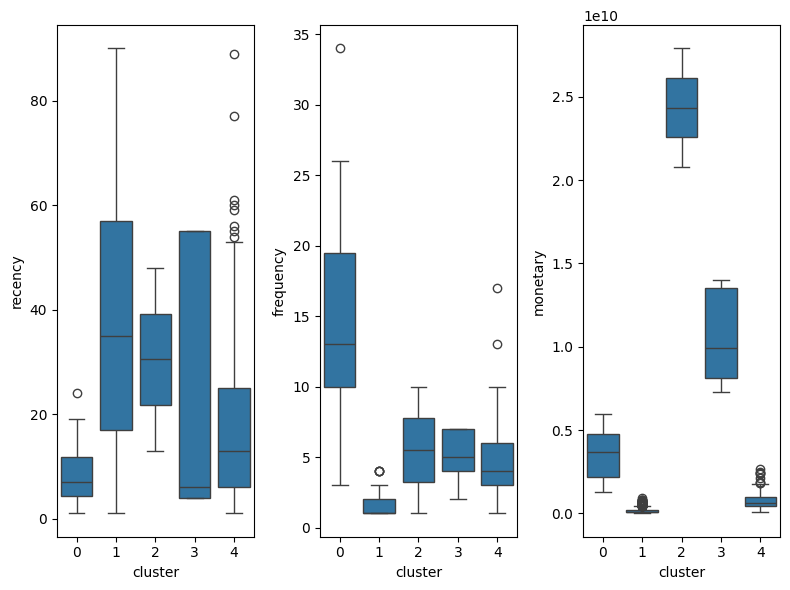

In [32]:
#Menampilkan boxplot dari RFM_k5
fig, ax = plt.subplots(1, 3, figsize=(8,6))
sns.boxplot(x="cluster", y="recency", data=RFM_k5, ax=ax[0])
sns.boxplot(x="cluster", y="frequency", data=RFM_k5, ax=ax[1])
sns.boxplot(x="cluster", y="monetary", data=RFM_k5, ax=ax[2])
plt.tight_layout()
plt.show()

Mini Project #3 Setelah hasil menggunakan k=5, terlihat, aku kembali ingin mencoba untuk k=6.

In [33]:
#Menjalankan k-means dengan nilai k = 6
k_means = KMeans(n_clusters=6, random_state=0)
k_means.fit(RFM_robust)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [34]:
#Pred menyimpan hasil prediksi label cluster untuk setiap data
pred = k_means.predict(RFM_robust)

In [35]:
#Menggabungkan dataframe data dan hasil label clustering
RFM_k6 = pd.concat([data, pd.Series(pred).rename("cluster")], axis=1)

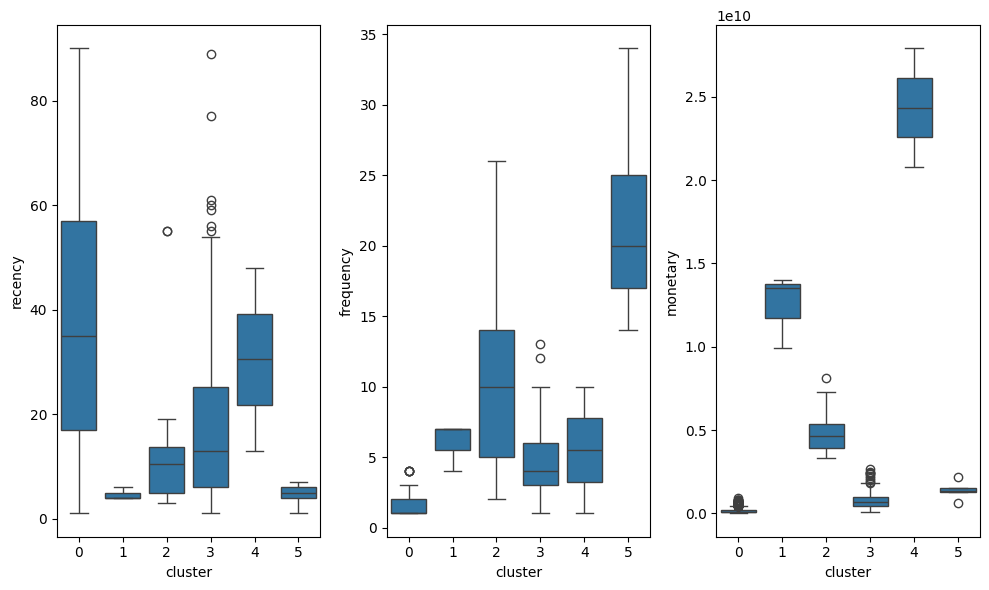

In [36]:
#Menampilkan boxplot dari RFM_k6
fig, ax = plt.subplots(1, 3, figsize=(10,6))
sns.boxplot(x="cluster", y="recency", data=RFM_k6, ax=ax[0])
sns.boxplot(x="cluster", y="frequency", data=RFM_k6, ax=ax[1])
sns.boxplot(x="cluster", y="monetary", data=RFM_k6, ax=ax[2])
plt.tight_layout()
plt.show()